In [0]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        !pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

     |████████████████████████████████| 2.9MB 2.7MB/s 


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings



# import warnings
warnings.filterwarnings('ignore')

In [0]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperf_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [0]:
#explore the dataset
studentsperf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [0]:
studentsperf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [0]:
#1. Are there any differences between the genders, ethnicities, 
#and parental level of education with respect to their performances in exams?

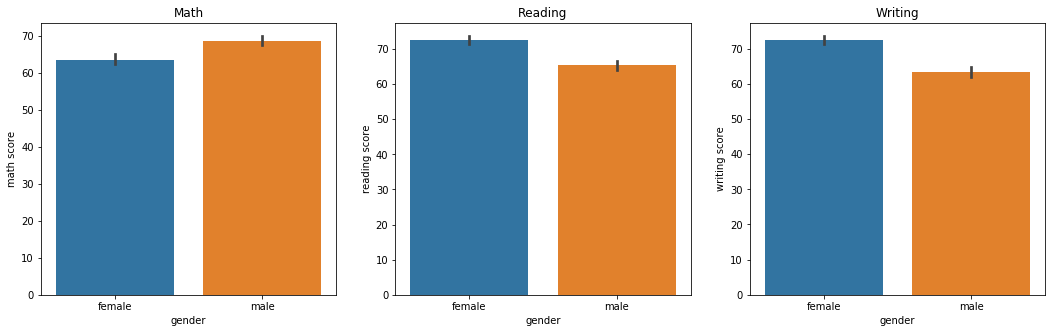

In [0]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(studentsperf_df["gender"], studentsperf_df["math score"])
plt.title("Math")

plt.subplot(1,3,2)
sns.barplot(studentsperf_df["gender"], studentsperf_df["reading score"])
plt.title("Reading")

plt.subplot(1,3,3)
sns.barplot(studentsperf_df["gender"], studentsperf_df["writing score"])
plt.title("Writing")

plt.show()

In [0]:
#grouing the 3 mentioned categoties by gender
studentsperf_df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [0]:
ttest_ind(studentsperf_df[studentsperf_df.gender=="female"][["math score", "reading score", "writing score"]],studentsperf_df[studentsperf_df.gender=="male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

In [0]:
# females are more successful at reading and writing and males are more successful at Math. We see from the ttest that the  differences are statistically significant

In [0]:
ethnicities=studentsperf_df["race/ethnicity"].unique()
grouped_df=studentsperf_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
  print("*******************************************************")
  print("Comparisons for variable: {}" .format(var))
  print("*******************************************************")
  for i in range(0, len(ethnicities)):
    for j in range(i+1, len(ethnicities)):
      print(
          "t-test betweeen groups {0} and {1}:".format(ethnicities[i],ethnicities[j]))
      print(ttest_ind(
          studentsperf_df[studentsperf_df["race/ethnicity"]==ethnicities[i]][var],studentsperf_df[studentsperf_df["race/ethnicity"]==ethnicities[j]][var]))
    

*******************************************************
Comparisons for variable: math score
*******************************************************
t-test betweeen groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test betweeen groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test betweeen groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test betweeen groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test betweeen groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test betweeen groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test betweeen groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test betweeen groups

In [0]:
studentsperf_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [0]:
#group E stands out
# From ttest difference is significant

In [0]:
# Parental level of education
studentsperf_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [0]:
# test to see if differences are significant
ethnicities = studentsperf_df["parental level of education"].unique()
grouped_df = studentsperf_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                studentsperf_df[studentsperf_df["parental level of education"]
                           == ethnicities[i]][var],
                studentsperf_df[studentsperf_df["parental level of education"]
                           == ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

In [0]:
#2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
studentsperf_df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [0]:
studentsperf_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [0]:
#standard probably had all the good nutrients for students to perform well while the other one doesn't
ttest_ind(studentsperf_df[studentsperf_df.lunch=="standard"][["math score", "reading score", "writing score"]],studentsperf_df[studentsperf_df.lunch=="free/reduced"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

In [0]:
#3.Does the test preparation course seem to have an effect on the exam performances?
studentsperf_df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [0]:

studentsperf_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [0]:
ttest_ind(studentsperf_df[studentsperf_df["test preparation course"]=="completed"][["math score", "reading score", "writing score"]],studentsperf_df[studentsperf_df["test preparation course"]=="none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

In [0]:
#5. Which 2 exam scores are most correlated with each other?

studentsperf_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


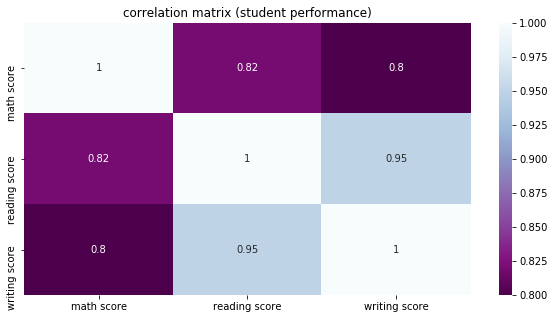

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [0]:
#heatmap_df=studentsperf_df.filter(["math score", "reading score", "writing score"])
heatmap_df=studentsperf_df[["math score", "reading score", "writing score"]].copy()
#heatmap_df=studentsperf_df.iloc[:, [5,6,7]].copy()
plt.figure(figsize=(10,5))
sns.heatmap(heatmap_df.corr().round(2), cmap="BuPu_r", annot=True)
#sns.heatmap(heatmap_df, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()
heatmap_df

In [0]:
#3.Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?
X = us[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]
#Transforming the variables
X = StandardScaler().fit_transform(X)            

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


NameError: ignored